<a href="https://colab.research.google.com/github/baska8072-wq/Baska/blob/main/Homework2_Baska_2C4024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

# Load dataset
df = sns.load_dataset("diamonds")

# Display unique values and counts
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: carat
carat
0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.50       1
2.70       1
3.40       1
4.00       1
3.67       1
Name: count, Length: 273, dtype: int64

Column: cut
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

Column: color
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

Column: clarity
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

Column: depth
depth
62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
52.2       1
53.4       1
72.2       1
72.9       1
54.7       1
Name: count, Length: 184, dtype: int64

Column: table
table
56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
        ... 
63.4       1
62.1       1
79.0       1
76.0       1
61.6       1
Name:

In [2]:
highest_price = df["price"].max()
lowest_price = df["price"].min()

print(f"Highest price: ${highest_price}")
print(f"Lowest price: ${lowest_price}")


Highest price: $18823
Lowest price: $326


In [3]:
df["size"] = df["x"] * df["y"] * df["z"]
df["size"].head()


,size
0,38.202030
1,34.505856
2,38.076885
3,46.724580
4,51.917250


In [4]:
corr_size_carat = df["size"].corr(df["carat"])
print(f"Correlation between size and carat: {corr_size_carat:.4f}")


Correlation between size and carat: 0.9763


In [5]:
avg_price_by_clarity = df.groupby("clarity")["price"].mean()
avg_price_by_cut = df.groupby("cut")["price"].mean()
avg_price_by_color = df.groupby("color")["price"].mean()

print("Average Price by Clarity:\n", avg_price_by_clarity)
print("\nAverage Price by Cut:\n", avg_price_by_cut)
print("\nAverage Price by Color:\n", avg_price_by_color)


Average Price by Clarity:
 clarity
IF      2864.839106
VVS1    2523.114637
VVS2    3283.737071
VS1     3839.455391
VS2     3924.989395
SI1     3996.001148
SI2     5063.028606
I1      3924.168691
Name: price, dtype: float64

Average Price by Cut:
 cut
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Good         3928.864452
Fair         4358.757764
Name: price, dtype: float64

Average Price by Color:
 color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64


/tmp/ipython-input-3440668559.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_clarity = df.groupby("clarity")["price"].mean()
/tmp/ipython-input-3440668559.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_cut = df.groupby("cut")["price"].mean()
/tmp/ipython-input-3440668559.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_color = df.groupby("color")["price"].mean()


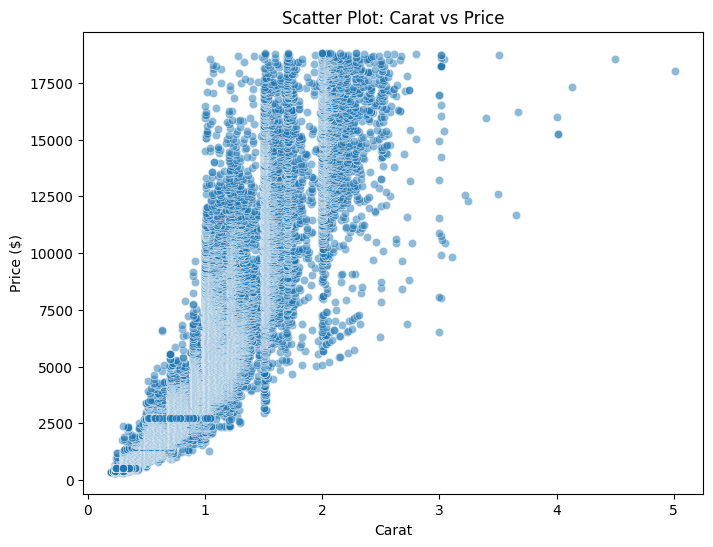

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="carat", y="price", alpha=0.5)
plt.title("Scatter Plot: Carat vs Price")
plt.xlabel("Carat")
plt.ylabel("Price ($)")
plt.show()


In [8]:
df["color_num"] = df["color"].map({'E':1, 'I':2, 'J':3, 'H':4, 'F':5, 'G':6, 'D':7})
df["cut_num"] = df["cut"].map({'Ideal':1, 'Premium':2, 'Good':3, 'Very Good':4, 'Fair':5})
df["clarity_num"] = df["clarity"].map({'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8})


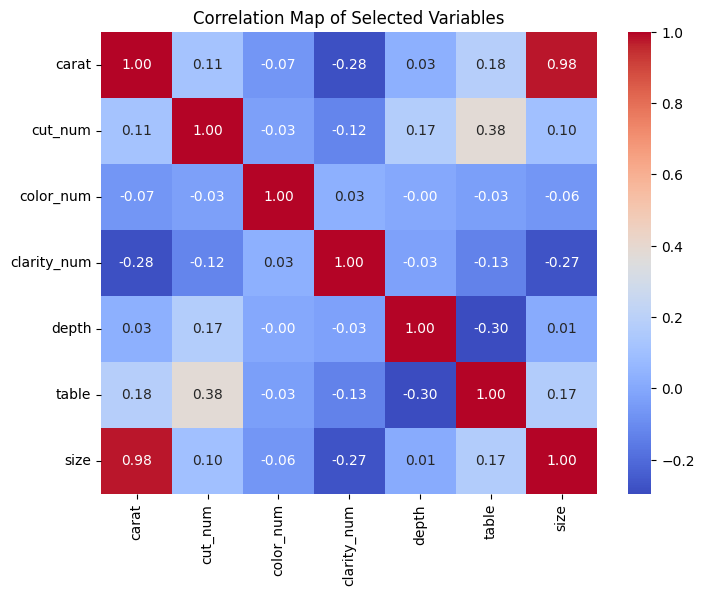

In [9]:
import seaborn as sns

corr_vars = df[["carat", "cut_num", "color_num", "clarity_num", "depth", "table", "size"]]
corr_matrix = corr_vars.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Map of Selected Variables")
plt.show()


In [10]:
import numpy as np
import statsmodels.api as sm

# Prepare data
df["ln_price"] = np.log(df["price"])
X = df[["carat", "cut_num", "color_num", "clarity_num", "depth", "table", "size"]]
X = sm.add_constant(X)
y = df["ln_price"]

# Run regression
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 4.551e+04
Date:                Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                        03:08:55   Log-Likelihood:                -25203.
No. Observations:               53940   AIC:                         5.042e+04
Df Residuals:                   53932   BIC:                         5.049e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.8918      0.110     62.791      